### HW 4<br>Yizhou Yao<br>DSC478

In [214]:
import pandas as pd
import numpy as np

### Problem 1
#### For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

#### a) Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [280]:
data = pd.read_table("segmentation_data.txt", sep = ",", header=None)
classes = pd.read_table("segmentation_classes.txt", sep = "\t", header=None)
feature_names = pd.read_table("segmentation_names.txt", header=None)

In [281]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [282]:
classes

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
...,...,...
2095,CEMENT,3
2096,CEMENT,3
2097,CEMENT,3
2098,CEMENT,3


In [283]:
feature_names

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2
5,VEDGE-MEAN
6,VEDGE-SD
7,HEDGE-MEAN
8,HEDGE-SD
9,INTENSITY-MEAN


- min-max normalization:

In [284]:
from sklearn.preprocessing import MinMaxScaler

In [285]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(np.array(data))

In [286]:
data_norm

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

we can see the data is now between 0 and 1.

#### b) Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visaulization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [287]:
from sklearn.cluster import KMeans 

In [288]:
kmeans = KMeans(n_clusters=7, max_iter=1000, verbose=1) # initialization

In [289]:
kmeans.fit(data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 15604509.643276047
start iteration
done sorting
end inner loop
Iteration 1, inertia 12863025.01631274
start iteration
done sorting
end inner loop
Iteration 2, inertia 12667824.250296954
start iteration
done sorting
end inner loop
Iteration 3, inertia 12632443.290464396
start iteration
done sorting
end inner loop
Iteration 4, inertia 12628368.957481893
start iteration
done sorting
end inner loop
Iteration 5, inertia 12626123.564393919
start iteration
done sorting
end inner loop
Iteration 6, inertia 12623836.489705576
start iteration
done sorting
end inner loop
Iteration 7, inertia 12621669.555697622
start iteration
done sorting
end inner loop
Iteration 8, inertia 12619580.098903788
start iteration
done sorting
end inner loop
Iteration 9, inertia 12612914.54527932
start iteration
done sorting
end inner loop
Iteration 10, inertia 12591569.495960591
start iteration
done sorting
end inner loop
Iteration

start iteration
done sorting
end inner loop
Iteration 10, inertia 12789521.819225864
start iteration
done sorting
end inner loop
Iteration 11, inertia 12772291.839390218
start iteration
done sorting
end inner loop
Iteration 12, inertia 12753688.442611543
start iteration
done sorting
end inner loop
Iteration 13, inertia 12739083.701960385
start iteration
done sorting
end inner loop
Iteration 14, inertia 12731597.762818975
start iteration
done sorting
end inner loop
Iteration 15, inertia 12729850.877125336
start iteration
done sorting
end inner loop
Iteration 16, inertia 12728807.894060882
start iteration
done sorting
end inner loop
Iteration 17, inertia 12728199.061199917
start iteration
done sorting
end inner loop
Iteration 18, inertia 12727509.995913552
start iteration
done sorting
end inner loop
Iteration 19, inertia 12726903.772627763
start iteration
done sorting
end inner loop
Iteration 20, inertia 12726557.345480623
start iteration
done sorting
end inner loop
Iteration 21, inertia

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [290]:
clusters = kmeans.predict(data)

In [291]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,6
1,6
2,1
3,6
4,6
...,...
2095,0
2096,0
2097,1
2098,1


In [292]:
# print cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names[0])

In [228]:
centroids

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,60.093103,108.408621,9.0,1.762452e-02,4.789272e-03,1.821743,3.446731,2.008142,4.096730,13.395338,11.540230,18.231035,10.414751,-5.565326,14.507088,-8.941762,18.344636,0.591616,-1.856482
1,130.750000,84.166667,9.0,3.469447e-18,6.481481e-02,22.037037,488.887664,26.824074,560.454281,47.064815,39.972223,56.759260,44.462964,-21.277778,29.083333,-7.805556,56.759260,0.387089,-2.384250
2,195.712154,138.959488,9.0,1.303009e-02,3.790571e-03,1.284767,2.377632,1.318053,2.513097,8.908947,7.095001,10.719261,8.912580,-5.441838,5.430941,0.010898,12.572850,0.521400,-0.522589
3,193.743750,44.700000,9.0,9.027778e-03,-8.673617e-18,0.875000,0.526896,1.184375,0.813267,117.742130,106.361111,134.936113,111.929167,-34.143056,51.581945,-17.438889,134.936113,0.217533,-2.298458
4,68.129139,198.509934,9.0,1.655629e-02,6.254599e-03,2.041759,1.849029,3.187638,5.428870,30.406794,26.342899,34.745033,30.132451,-12.191685,13.014717,-0.823032,38.291759,0.359877,0.230755
5,179.305913,137.832905,9.0,1.570980e-02,5.427021e-03,2.758212,5.717558,4.026135,11.289539,45.280491,40.338189,55.906599,39.596687,-14.826907,31.878320,-17.051414,55.914311,0.303180,-2.044850
6,68.292553,50.728723,9.0,1.300236e-02,1.182033e-03,1.157210,0.743203,1.229314,0.837236,104.531915,94.300828,120.844564,98.450355,-30.693262,48.937943,-18.244681,120.844564,0.231385,-2.249106


In [293]:
from sklearn import metrics

+ compute and display the silhouette values for all clusters

In [230]:
silhouettes = metrics.silhouette_samples(data, clusters)
print(silhouettes[:20])

[0.21464308 0.2155427  0.26510417 0.36908175 0.22043827 0.09491912
 0.38160904 0.36362175 0.37844025 0.32019876 0.35673631 0.31866097
 0.00522308 0.22478332 0.27953677 0.34593696 0.0946822  0.1222898
 0.31940911 0.35146447]


- compute and display the mean silhouette value

In [231]:
print(silhouettes.mean())

0.3178249546343258


In [232]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

- plot the solhouette plot

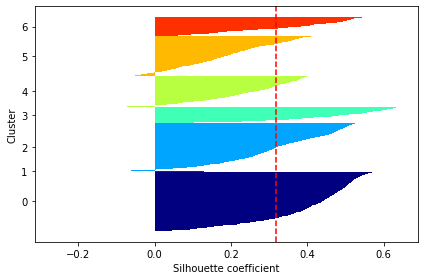

In [233]:
import matplotlib.pyplot as pl
plot_silhouettes(data, clusters)

In [234]:
from sklearn.metrics import completeness_score, homogeneity_score

In [238]:
print("completeness score is {}.".format(completeness_score(classes[1], clusters)))

completeness score is 0.5422821349163645.


In [239]:
print("homogeneity score is {}.".format(homogeneity_score(classes[1],clusters)))

homogeneity score is 0.4801867419322856.


#### c) Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [240]:
from sklearn import decomposition

In [241]:
data_norm.shape

(2100, 19)

In [242]:
# PCA with all 19 features fomr the original dataset
pca = decomposition.PCA(n_components=data_norm.shape[1])
dataTrans = pca.fit(data_norm).transform(data_norm)

In [243]:
print(dataTrans)

[[-6.89082181e-01  5.32951033e-01  2.46098334e-01 ... -3.11214138e-09
   1.10281144e-08  1.65552037e-16]
 [-6.66919524e-01  5.10674647e-01  3.37971716e-01 ...  2.10646037e-09
  -9.82754290e-09  1.57257211e-16]
 [-7.12027478e-01  7.70943647e-01 -1.55821890e-01 ...  3.11649214e-09
   2.08700508e-09  1.89045379e-16]
 ...
 [-5.07744749e-01 -1.29415329e-01 -8.22455123e-02 ... -1.62643380e-09
   3.38481900e-09  3.13580146e-17]
 [-4.79090569e-01 -8.63446712e-02 -1.58711407e-01 ... -4.39254180e-09
   1.67499499e-09  4.07205689e-17]
 [-4.42253816e-01 -1.06225249e-01 -4.71272464e-02 ... -3.03500834e-09
   3.98533616e-09  1.03174093e-16]]


In [244]:
# make a dataframe of all PC's and the corresponding variance and cumulative vairiance
df = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'PC':['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6', 'PC7','PC8','PC9', 'PC10','PC11', 
                   'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17','PC18','PC19']})
df["cumulative_variance"] = df["variance"].cumsum()

In [246]:
df

,variance,PC,cumulative_variance
0,6.071423e-01,PC1,0.607142
1,1.319698e-01,PC2,0.739112
2,1.012377e-01,PC3,0.840350
3,4.543539e-02,PC4,0.885785
4,3.547361e-02,PC5,0.921259
5,1.988035e-02,PC6,0.941139
6,1.891970e-02,PC7,0.960059
7,1.615409e-02,PC8,0.976213
8,1.065601e-02,PC9,0.986869
9,7.113375e-03,PC10,0.993982


From the above table, we can see when there are 7 PC's the total variance explained is 96% or at least 95%.

- plot of PC variance

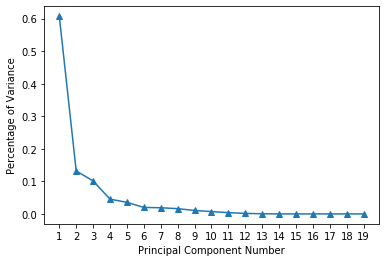

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline
variance = pca.explained_variance_ratio_

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 20, 1), variance, marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.xticks(range(1, 20, 1))
plt.show()

- Transform data into 7 features


In [248]:
pca = decomposition.PCA(n_components=7)
dataTrans_7 = pca.fit(data_norm).transform(data_norm)

In [249]:
# the data has 7 features now
dataTrans_7.shape

(2100, 7)

In [250]:
print(dataTrans_7)

[[-0.68908218  0.53295103  0.24609833 ... -0.07643294  0.0478044
  -0.04732089]
 [-0.66691952  0.51067465  0.33797172 ... -0.04117773  0.05655091
  -0.04170747]
 [-0.71202748  0.77094365 -0.15582189 ... -0.16662228  0.04381397
  -0.06069494]
 ...
 [-0.50774475 -0.12941533 -0.08224551 ... -0.02791769 -0.03189182
  -0.10525024]
 [-0.47909057 -0.08634467 -0.15871141 ...  0.00443463 -0.00371285
  -0.08505898]
 [-0.44225382 -0.10622525 -0.04712725 ...  0.01522668 -0.2061659
   0.15294393]]


In [251]:
print(pca.explained_variance_ratio_)

[0.60714234 0.13196979 0.10123773 0.04543539 0.03547361 0.01988035
 0.0189197 ]


#### d) Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.

In [252]:
kmeans = KMeans(n_clusters=7, max_iter=1000, verbose=1) # initialization

In [253]:
kmeans_pca = kmeans.fit(dataTrans_7)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 330.21998549402974
start iteration
done sorting
end inner loop
Iteration 1, inertia 305.0029659706429
start iteration
done sorting
end inner loop
Iteration 2, inertia 293.7175786540089
start iteration
done sorting
end inner loop
Iteration 3, inertia 289.56251363606964
start iteration
done sorting
end inner loop
Iteration 4, inertia 288.61734579108906
start iteration
done sorting
end inner loop
Iteration 5, inertia 288.2653483921997
start iteration
done sorting
end inner loop
Iteration 6, inertia 288.0429111720449
start iteration
done sorting
end inner loop
Iteration 7, inertia 287.91251564902814
start iteration
done sorting
end inner loop
Iteration 8, inertia 287.8073550491439
start iteration
done sorting
end inner loop
Iteration 9, inertia 287.6465760539851
start iteration
done sorting
end inner loop
Iteration 10, inertia 287.336971204361
start iteration
done sorting
end inner loop
Iteration 11, i

Iteration 9, inertia 312.4589220360045
start iteration
done sorting
end inner loop
Iteration 10, inertia 312.41002715305586
start iteration
done sorting
end inner loop
Iteration 11, inertia 312.38229055998994
start iteration
done sorting
end inner loop
Iteration 12, inertia 312.3700524457647
start iteration
done sorting
end inner loop
Iteration 13, inertia 312.35776648479236
start iteration
done sorting
end inner loop
Iteration 14, inertia 312.33017202470603
start iteration
done sorting
end inner loop
Iteration 15, inertia 312.3121351611534
start iteration
done sorting
end inner loop
Iteration 16, inertia 312.26781236169995
start iteration
done sorting
end inner loop
Iteration 17, inertia 312.231180183172
start iteration
done sorting
end inner loop
Iteration 18, inertia 312.20139396411986
start iteration
done sorting
end inner loop
Iteration 19, inertia 312.16809380973706
start iteration
done sorting
end inner loop
Iteration 20, inertia 312.1254679132535
start iteration
done sorting
en

In [254]:
clusters_pca = kmeans_pca.predict(dataTrans_7)

In [255]:
pd.DataFrame(clusters_pca, columns=["Cluster Lower Dimension"])

,Cluster Lower Dimension
0,4
1,4
2,4
3,4
4,4
...,...
2095,0
2096,5
2097,2
2098,2


In [256]:
silhouettes_pca = metrics.silhouette_samples(dataTrans_7, clusters_pca)
print(silhouettes_pca)

[ 0.58684873  0.57358868  0.4828261  ... -0.0335456   0.16841486
  0.08088785]


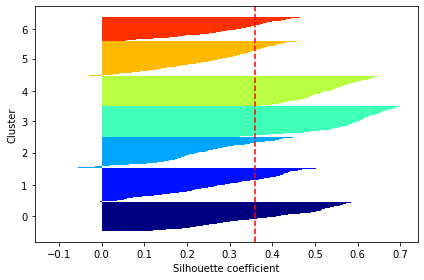

In [257]:
plot_silhouettes(dataTrans_7, clusters_pca)

In [259]:
# completeness score
print("completeness score before PCA dimension reduction: {}".format(completeness_score(classes[1], clusters)))
print("completeness score after PCA dimension reduction: {}".format(completeness_score(classes[1], clusters_pca)))
print("homogeneity score before PCA dimension reduction: {}".format(homogeneity_score(classes[1], clusters)))
print("homogeneity score after PCA dimension reduction: {}".format(homogeneity_score(classes[1], clusters_pca)))

completeness score before PCA dimension reduction: 0.5422821349163645
completeness score after PCA dimension reduction: 0.6107955063694607
homogeneity score before PCA dimension reduction: 0.4801867419322856
homogeneity score after PCA dimension reduction: 0.609136404973329


From above results, we can see that PCA dimension reduction has improved both completness score and homogeneity score. It suggests we can reduce our dimension safely using PCA while not lose the information contained in the data.

### Problem 2. 
#### Item-Based Joke Recommendation [Dataset: jokes.zip] <br>For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):

#### a) Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for at least 2 users. Use both standard item-based collaborative filtering (based on the rating prediction function "standEst") and the SVD-based version of the item-based CF (using "svdEst" as the prediction engine) to generate these recommendations for the two users and note the differences. You should show the text of the recommended jokes as well as the predicted ratings for each. Complete the definition for the function "test". This function iterates over all users and for each performs

In [260]:
jokes = pd.read_csv("jokes.csv", header=None, index_col=None)
jokes = jokes[1]

In [261]:
jokes 

0     A man visits the doctor. The doctor says "I ha...
1     This couple had an excellent relationship goin...
2     Q. What's 200 feet long and has 4 teeth? A. Th...
3     Q. What's the difference between a man and a t...
4     Q. What's O. J. Simpson's Internet address? A....
                            ...                        
95    Two attorneys went into a diner and ordered tw...
96    A teacher is explaining to her class how diffe...
97    Age and Womanhood1. Between the ages of 13 and...
98    A bus station is where a bus stops.A train sta...
99    Q: What's the difference between greeting a Qu...
Name: 1, Length: 100, dtype: object

In [262]:
data = pd.read_csv("modified_jester_data.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.94,5.47,16.19,5.51,6.92,8.48,14.20,14.83,4.98,13.96,...,6.58,9.93,15.37,7.89,13.72,6.87,13.23,5.47,14.54,13.38
996,15.27,11.39,16.39,5.37,7.41,16.58,12.17,2.84,5.13,4.30,...,0.00,0.00,0.00,0.00,6.58,0.00,0.00,0.00,0.00,0.00
997,16.58,16.63,15.85,7.89,14.40,9.74,14.54,13.14,6.34,11.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
998,3.67,4.45,3.67,3.67,9.40,7.65,3.86,4.40,3.67,4.93,...,3.82,6.87,6.87,3.77,3.77,3.77,3.77,3.77,3.77,3.28


In [263]:
from numpy import *
from numpy import linalg as la
import pdb

In [264]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)


def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [265]:
jesterMat = np.mat(data)

In [266]:
jesterMat

matrix([[ 3.18, 19.79,  1.34, ...,  0.  ,  0.  ,  0.  ],
        [15.08, 10.71, 17.36, ..., 11.34,  6.68, 12.07],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [16.58, 16.63, 15.85, ...,  0.  ,  0.  ,  0.  ],
        [ 3.67,  4.45,  3.67, ...,  3.77,  3.77,  3.28],
        [ 9.88, 11.73,  9.16, ...,  0.  ,  0.  ,  0.  ]])

In [267]:
user1 = 68
# estMethod=svdEst 
recommendations_68_svd = recommend(jesterMat, user1, N=5, simMeas=cosineSim, estMethod=svdEst)
# standEst
recommendations_68_stand = recommend(jesterMat, user1, N=5, simMeas=cosineSim, estMethod=standEst)

In [268]:
user2 = 393
# estMethod=svdEst 
recommendations_393_svd = recommend(jesterMat, user2, N=5, simMeas=cosineSim, estMethod=svdEst)
# standEst
recommendations_393_stand = recommend(jesterMat, user2, N=5, simMeas=cosineSim, estMethod=standEst)

#### svdEst method  vs standEst method

In [269]:
def showRec(user, recommendation):
    print("Recommended Items for User", user, ":\n")
    for i, p in recommendation:
        print("Joke: ", jokes[i],"---predicted rating: ", p, "\n")

In [270]:
# user 68
print("svdEst method:")
showRec(user1, recommendations_68_svd)
print("standEst method:")
showRec(user1, recommendations_68_stand)
# user 393
print("svdEst method:")
showRec(user2, recommendations_393_svd)
print("standEst method:")
showRec(user2, recommendations_393_stand)

svdEst method:
Recommended Items for User 68 :

Joke:  What is the difference between men and women:A woman wants one man to satisfy her every need.A man wants every woman to satisfy his one need. ---predicted rating:  8.369861418846016 

Joke:  Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes it's an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say good-bye. As Bill pulls the car onto the road he turns to Hillary and says 'Now aren't you glad you married me and not him ? You could've been the wife of a grease monkey !' To which Hillary replied 'No Bill. If I would have married him you'd be pumping gas and he would be the President !'  ---predicted rating:  8.367709181541406 

Joke:  Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $5

#### b) Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function), and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [271]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [272]:
# Write this function to iterate over all users and for each perform evaluation by calling
# the above cross_validate_user function on each user. MAE will be the ratio of total error 
# across all test cases to the total number of test cases, across all users
def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    totalErr = 0
    totalCount = 0
    for user in np.arange(0, dataMat.shape[0], 1):
        error_u, count_u = cross_validate_user(dataMat, user, test_ratio, estMethod, simMeas)
        totalErr += error_u
        totalCount += count_u
    MAE = totalErr/totalCount
    return MAE

- MAE for standEst

In [273]:
MAE_stand = test(jesterMat, 0.2, standEst)

In [274]:
print("MAE for standEst is ", MAE_stand)

MAE for standEst is  3.70400083177568


- MAE for svdEst

In [275]:
MAE_svd = test(jesterMat, 0.2, svdEst)

In [276]:
print("MAE for svdEst is ", MAE_svd)

MAE for svdEst is  3.6475205581476438


From the above results, we can see svdEst has a slightly smaller MAE than standEst.

#### c) Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function, and prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings. [Note: For hints on how to accomplish this task, please see comments at the end of the provided module as well as comments for the provided stub function.]

In [277]:
def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5+0.5*corrcoef(inA, inB, rowvar = 0)[0][1]

def get_joke_text(jokes, id):
    return jokes[id]

def print_most_similar_jokes(rating, jokes, queryJoke, k, metric=pearsonSim):
    print ('Selected joke: \n', jokes[queryJoke])
    print ('Top', k, 'Recommended jokes are :')
    comparisonJoke = rating[queryJoke]
    sim = {}
    for i in range(jokes.shape[0]):
        # Adding a new key value pair
        sim.update({i : metric(rating[i].T, comparisonJoke.T)})
    import operator
    # sort the dictionary by value (Similarity)
    sorted_sim = dict(sorted(sim.items(), key=operator.itemgetter(1),reverse=True))
    # save the 
    idList = list(sorted_sim.keys())
    for i in range(1, k+1):
        jokeID = idList[i]
        print('---------\n{}\n'.format(get_joke_text(jokes, jokeID)))
    return sorted_sim

In [278]:
def load_jokes(file):
    jokes = np.genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes
jokesList = load_jokes("jokes.csv")
sorted_sim = print_most_similar_jokes(jesterMat, jokesList, 7, 10, pearsonSim)

Selected joke: 
 Q. Did you hear about the dyslexic devil worshipper? A. He sold his soul to Santa.
Top 10 Recommended jokes are :
---------
A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"

---------
Q: What is the Australian word for a boomerang that won't   come back? A: A stick

---------
A horse walks into a bar. Bartender says:"So why the long face?"

---------
A guy stood over his tee shot for what seemed an eternity looking up looking down measuring the distance figuring the wind direction and speed. Driving his partner nuts.Finally his exasperated partner says "What the hell is taking so long? Hit the goddamn ball!"The guy answers "My wife is up there watching me from the clubhouse. I want to make this a perfect shot.""Well hell man you don't stand a snowball's chance in hell of hitting her from here!"

---------
A couple has been married for 75 years. For